In [101]:
%run 01-model.ipynb

In [56]:
from cobra.util import create_stoichiometric_matrix

In [57]:
S = create_stoichiometric_matrix(model)

In [58]:
S.shape

(1822, 2330)

In [59]:
import numpy as np

In [60]:
non_zero_elements = np.count_nonzero(S)
non_zero_elements

8277

In [61]:
total_elements = S.shape[0] * S.shape[1]
total_elements

4245260

In [62]:
percentage_non_zero = 100 * (non_zero_elements/total_elements)
percentage_non_zero

0.19497039050611742

model is not very sparse

find degrees of freedom

In [63]:
S.shape[1] - np.linalg.matrix_rank(S)

610

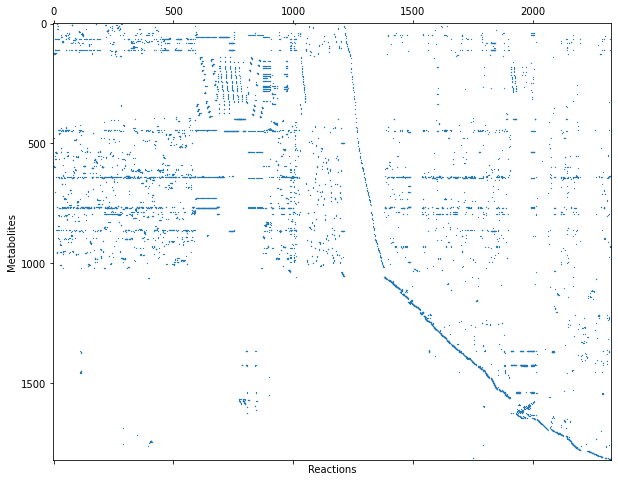

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.spy(S, precision=0.01, markersize=0.3)
plt.xlabel('Reactions')
plt.ylabel('Metabolites')
plt.show()

In [65]:
S_bin = np.where(S!=0., 1., 0.)

In [66]:
A_v = S_bin.T.dot(S_bin)

In [67]:
A_v.diagonal().argmax()

1006

In [68]:
model.reactions[A_v.diagonal().argmax()]

Reaction identifier,PROTEINpolym
Name,Artificial reaction
Memory address,0x07f1abaa19c50
Stoichiometry,1.033 ALA + 0.413 ARG + 0.209 ASN + 0.628 ASP + 39.729 ATP + 0.079 CYS + 0.3 GLN + 0.899 GLU + 0.862 GLY + 30.489 H2O + 0.205 HIS + 0.396 ILE + 0.704 LEU + 0.651 LYS + 0.105 MET + 0.312 PHE + 0.441... 1.033 L-Alanine + 0.413 L-Arginine + 0.209 L-Asparagine + 0.628 L-Aspartate + 39.729 ATP + 0.079 L-Cysteine + 0.3 L-Glutamine + 0.899 L-Glutamate + 0.862 Glycine + 30.489 Water + 0.205 L-Histidine ...
GPR,1144826 or 1143355 or 1147842 or 1115657 or 1173061 or 52431 or 1097644 or 204505 or 1148089 or 1...
Lower bound,0.0
Upper bound,1000.0


In [69]:
A_v.diagonal().max()

25.0

In [70]:
A_x = S_bin.dot(S_bin.T)

In [71]:
model.metabolites[A_x.diagonal().argmax()]

Metabolite identifier,H2O
Name,Water
Memory address,0x07f1ac092b780
Formula,H2O
Compartment,c
In 438 reaction(s),"r514, r553, r2003, r895, r1953, r324, r166, r433, r2000, r2169, r2351, r1213, r325, r2170, r275, r539, r567, r2324, r963, r359, r874, r936, r551, r19, r630, r2056, r2828, r298, r2847, r515, r1945, ..."


In [72]:
connectivities = A_x.diagonal()

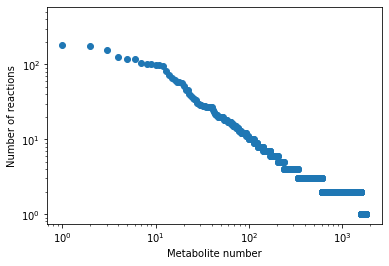

In [73]:
plt.loglog(sorted(connectivities, reverse=True), 'o')
plt.xlabel('Metabolite number')
plt.ylabel('Number of reactions')
plt.show()

In [74]:
connectivity = sorted(zip(model.metabolites, A_x.diagonal()), key=lambda item: item[1], reverse=True)
connectivity[0:10]

[(<Metabolite H2O at 0x7f1ac092b780>, 438.0),
 (<Metabolite NADPH at 0x7f1ac0915208>, 182.0),
 (<Metabolite NADP at 0x7f1ac09150f0>, 179.0),
 (<Metabolite ATP at 0x7f1ac2113b38>, 154.0),
 (<Metabolite COA at 0x7f1ac099d400>, 124.0),
 (<Metabolite CO2 at 0x7f1ac099ef98>, 118.0),
 (<Metabolite O2 at 0x7f1ac0912160>, 117.0),
 (<Metabolite PI at 0x7f1ac0935b38>, 106.0),
 (<Metabolite NAD at 0x7f1ac091ac50>, 102.0),
 (<Metabolite NADH at 0x7f1ac091ada0>, 100.0)]

In [75]:
import networkx as nx

In [76]:
compound_centric_network = nx.from_numpy_matrix(A_x)

In [77]:
mapping = dict(zip(range(0, len(model.metabolites)), model.metabolites))
compound_centric_network = nx.relabel_nodes(compound_centric_network, mapping)

In [78]:
metabolite_degrees = compound_centric_network.degree()


In [79]:
sorted_metabolite_degrees = sorted(metabolite_degrees, key=lambda item: item[1], reverse=True)
sorted_metabolite_degrees[0:10]

[(<Metabolite H2O at 0x7f1ac092b780>, 596),
 (<Metabolite NADPH at 0x7f1ac0915208>, 297),
 (<Metabolite NADP at 0x7f1ac09150f0>, 295),
 (<Metabolite ATP at 0x7f1ac2113b38>, 284),
 (<Metabolite PPI at 0x7f1ac0902320>, 216),
 (<Metabolite O2 at 0x7f1ac0912160>, 200),
 (<Metabolite PI at 0x7f1ac0935b38>, 200),
 (<Metabolite NAD at 0x7f1ac091ac50>, 190),
 (<Metabolite CO2 at 0x7f1ac099ef98>, 187),
 (<Metabolite COA at 0x7f1ac099d400>, 183)]

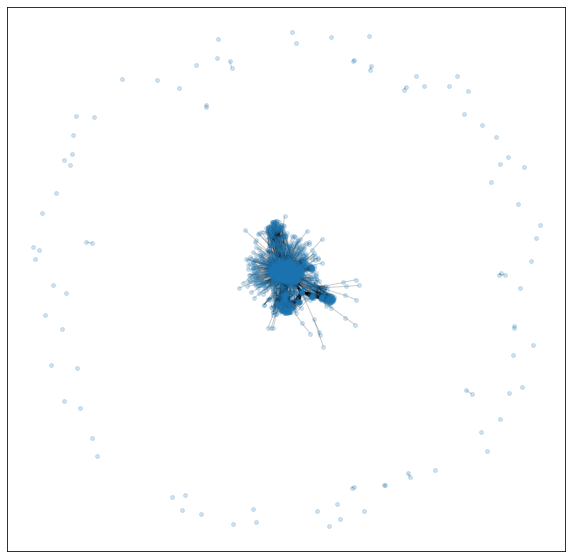

In [80]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(compound_centric_network, node_size=15, alpha=.2, with_labels=False)

In [81]:
highly_connected_metabolites = [metabolite for metabolite, degree in sorted_metabolite_degrees if degree > 90]

In [82]:
compound_centric_network_pruned = compound_centric_network.copy()
for metabolite in highly_connected_metabolites:
    compound_centric_network_pruned.remove_node(metabolite)
compound_centric_network_pruned = compound_centric_network_pruned.subgraph(max(nx.connected_components(compound_centric_network_pruned), key=len))

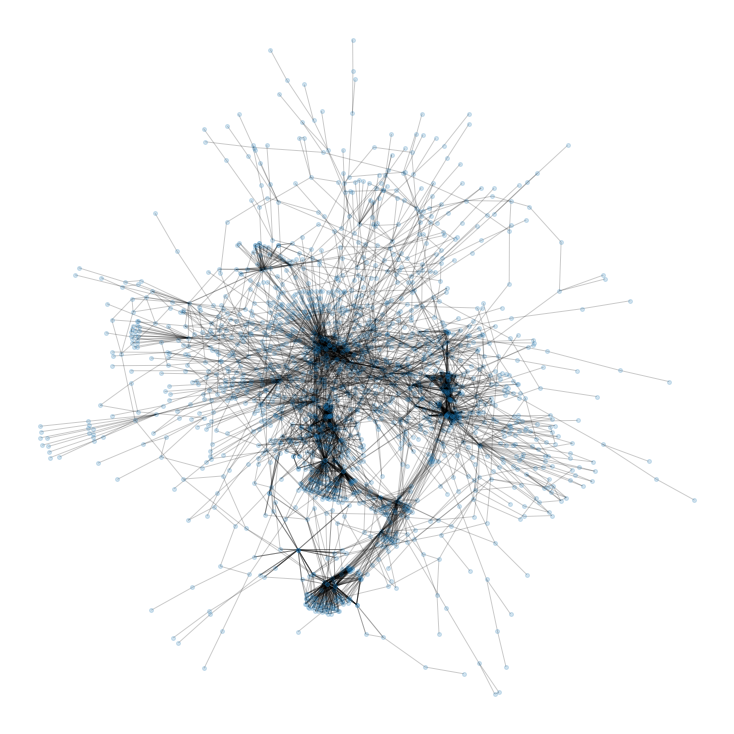

In [83]:
plt.figure(figsize=(10, 10))
nx.draw_spring(compound_centric_network_pruned, node_size=15, alpha=.2, with_labels=False)

In [141]:
for met in model.reactions.query('S', 'id'):
    print(met.id)

BOUNDARY_ASNe
BOUNDARY_ASPe
BOUNDARY_CHOSLFe
BOUNDARY_CYSe
BOUNDARY_DHSKe
BOUNDARY_H2SO3e
BOUNDARY_HISe
BOUNDARY_LYSe
BOUNDARY_RESe
BOUNDARY_SALIe
BOUNDARY_SERe
BOUNDARY_SLFe
BOUNDARY_SMEe
BOUNDARY_SORe
BOUNDARY_SOTe
BOUNDARY_STACe
BOUNDARY_SUCCe
BOUNDARY_SUCe
BOUNDARY_SMAN
BOUNDARY_SMAZAAe
BOUNDARY_SMAZAEe
BOUNDARY_SMAZAFe
BOUNDARY_SMFK17P2Ae
BOUNDARY_ETHSAe
BOUNDARY_STYRe
BOUNDARY_SORBAe
BOUNDARY_SMFUNe
BOUNDARY_ACSTARCHe
BOUNDARY_SALe
BOUNDARY_SEBAAe
BOUNDARY_DASNe
BOUNDARY_HSERe
BOUNDARY_HISNe
BOUNDARY_GSNe
BOUNDARY_INSe
DRAIN_LIPIDS
BOUNDARY_SMNIGNe
BOUNDARY_SMAZABe
BOUNDARY_SMAZACe
BOUNDARY_SMAZADe
BOUNDARY_SMPYRAe
BOUNDARY_SMPYRJe
BOUNDARY_SMPYRIe
BOUNDARY_SMPYRHe
BOUNDARY_SMPYREe
BOUNDARY_SMPYRGe
BOUNDARY_SMPYRKe
BOUNDARY_CYSTe
BOUNDARY_CYSAe
BOUNDARY_SMTAN1612e
BOUNDARY_STARCHe
BOUNDARY_HESPEe
BOUNDARY_HESPE7BGe
BOUNDARY_ASe
BOUNDARY_SMNYGAe
BOUNDARY_SMRUBFBe
BOUNDARY_SMN1368THNe
BOUNDARY_SMFONSe
BOUNDARY_SMFONC2e
BOUNDARY_SMFONCe
BOUNDARY_SMFONB2e
BOUNDARY_SMFONBe
BOUNDARY_SM

In [84]:
model.metabolites.TRP

Metabolite identifier,TRP
Name,L-Tryptophan
Memory address,0x07f1ac0938f60
Formula,C11H12N2O2
Compartment,c
In 9 reaction(s),"r3008, PROTEINpolym, r2402, psiD, r385, r1266, r400, r1265, r1080"


In [85]:
print(model.reactions.r1080)
print(model.reactions.psiD)
print(model.reactions.psiD)
print(model.reactions.r1266)
print(model.reactions.r1265)
print(model.reactions.r3008)
print(model.reactions.r2402)
print(model.reactions.r385)
print(model.reactions.r400)

r1080: TRPe <=> TRP
psiD: TRP --> CO2 + TRYP
psiD: TRP --> CO2 + TRYP
r1266: 0.951 ALA + 0.307 ARG + 0.366 ASN + 0.644 ASP + 40.39 ATP + 0.146 CYS + 0.249 GLN + 0.38 GLU + 0.687 GLY + 0.059 HIS + 0.351 ILE + 0.702 LEU + 0.19 LYS + 0.044 MET + 0.322 PHE + 0.322 PRO + 1.272 SER + 1.082 THR + 0.278 TRP + 0.395 TYR + 0.614 VAL --> 40.39 ADP + GAMYLe + 40.49 PI
r1265: 0.622 ALA + 0.226 ARG + 0.452 ASN + 0.773 ASP + 39.37 ATP + 0.17 CYS + 0.283 GLN + 0.32 GLU + 0.754 GLY + 0.132 HIS + 0.509 ILE + 0.716 LEU + 0.189 LYS + 0.151 MET + 0.264 PHE + 0.358 PRO + 1.018 SER + 0.716 THR + 0.207 TRP + 0.66 TYR + 0.603 VAL --> AAMYLe + 39.37 ADP + 39.37 PI
r3008: DMPP + TRP --> 7DMLTRP + PPI
r2402: ATP + TRNA_TRP + TRP --> AATRNA_TRP + AMP + PPI
r385: IGP + SER --> H2O + T3P1 + TRP
r400: O2 + TRP --> FKYN


In [86]:
model.metabolites.get_by_id('T3P1')

Metabolite identifier,T3P1
Name,D-Glyceraldehyde 3-phosphate
Memory address,0x07f1ac093b898
Formula,C3H7O6P
Compartment,c
In 12 reaction(s),"r13a, r12a, r63, r28, r29a, r155, r1273, r143, r385, r27, r1267, r14"


In [87]:
model.metabolites.get_by_id('FKYN')

Metabolite identifier,FKYN
Name,L-Formylkynurenine
Memory address,0x07f1ac098cb70
Formula,C11H12N2O4
Compartment,c
In 2 reaction(s),"r401, r400"


In [88]:
model.metabolites.get_by_id('GAMYLe')

Metabolite identifier,GAMYLe
Name,Glucoamylase (secreted to the medium)
Memory address,0x07f1ac09bc518
Formula,
Compartment,e
In 2 reaction(s),"r1266, BOUNDARY_GAMYLe"


In [89]:
model.metabolites.get_by_id('PI')

Metabolite identifier,PI
Name,Orthophosphate
Memory address,0x07f1ac0935b38
Formula,H3PO4
Compartment,c
In 106 reaction(s),"r521, r324, r1154, r166, r199, r14, r489, GROWTH, r529, r291, r672, r451, r2611, r2347, r62, r479, r909, r374, r2706, r472, r551, r307, r471, r19, r50a, r368, r892, r428, r2828, r1273, r465, r956, ..."


In [90]:
model.metabolites.get_by_id('AAMYLe')

Metabolite identifier,AAMYLe
Name,Alpha-amylase (secreted to the medium)
Memory address,0x07f1ac214b748
Formula,
Compartment,e
In 2 reaction(s),"r1265, BOUNDARY_AAMYLe"


In [91]:
model.metabolites.get_by_id('AATRNA_TRP')

Metabolite identifier,AATRNA_TRP
Name,Aminoacyl-tRNA (Trp) loaded
Memory address,0x07f1ac0d7bc18
Formula,C11H11N2O2R
Compartment,c
In 1 reaction(s),r2402


In [92]:
model.metabolites.get_by_id('FKYN')

Metabolite identifier,FKYN
Name,L-Formylkynurenine
Memory address,0x07f1ac098cb70
Formula,C11H12N2O4
Compartment,c
In 2 reaction(s),"r401, r400"


In [93]:
model.metabolites.get_by_id('PPI')

Metabolite identifier,PPI
Name,Pyrophosphate
Memory address,0x07f1ac0902320
Formula,H4O7P2
Compartment,c
In 99 reaction(s),"r102, r666, r317, r651, r869, r2420, r2412, r662, r804, r3006, r900, r522, r652, r811, r441, r667, r867, r868, r2338, r2414, r3008, r1216, r3007, r2402, r986, r213, r524, r523, r657, r2419, r3000, ..."


In [97]:
TRP_participation = A_x[model.metabolites.index('TRP'),model.metabolites.index('TRP')]

In [98]:
TRP_participation

9.0

In [96]:
S_psi_pathway = np.array([[ 1.  , -1.  ,  -1.  ,  0. ,  0.  ,  0.  ,  0.  ],
                          [ 0.  ,  1.  ,   0.  , -1. ,  0.  ,  0.  ,  0.  ],
                          [ 0.  ,  0.  ,   0.  ,  0. ,  1.  , -1.  ,  0.  ],
                          [ 0.  ,  0.  ,   0.  ,  0. ,  0.  ,  1.  , -1.  ]])

TRY CHANGING BOUNDS OF REACTIONS TO PUSH TOWARDS PSILOCYBIN PRODUCTION
START WITH TRP PATHWAYS

In [99]:
model.reactions.r1266

Reaction identifier,r1266
Name,Artifical protein synthesis reaction
Memory address,0x07f1abaa72908
Stoichiometry,0.951 ALA + 0.307 ARG + 0.366 ASN + 0.644 ASP + 40.39 ATP + 0.146 CYS + 0.249 GLN + 0.38 GLU + 0.687 GLY + 0.059 HIS + 0.351 ILE + 0.702 LEU + 0.19 LYS + 0.044 MET + 0.322 PHE + 0.322 PRO + 1.272 S... 0.951 L-Alanine + 0.307 L-Arginine + 0.366 L-Asparagine + 0.644 L-Aspartate + 40.39 ATP + 0.146 L-Cysteine + 0.249 L-Glutamine + 0.38 L-Glutamate + 0.687 Glycine + 0.059 L-Histidine + 0.351 L-Isole...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [106]:
model.objective = model.reactions.r385
print(model.optimize().fluxes["r385"])

48.21862348178136


In [107]:
with model:
    model.reactions.r1266.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.21862348178136


In [108]:
with model:
    model.reactions.r1265.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.21862348178136


In [109]:
with model:
    model.reactions.r3008.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.21862348178136


In [116]:
with model:
    model.reactions.r2402.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.21862348178122


In [122]:
with model:
    model.reactions.r400.bounds = 0, 1000
    model.objective = model.reactions.psiM
    max = model.optimize().fluxes["psiM"]
    print(max)

3.1395808620007912


In [126]:
model.metabolites.CHOR

Metabolite identifier,CHOR
Name,Chorismate
Memory address,0x07f1ac0b58c88
Formula,C10H10O6
Compartment,c
In 4 reaction(s),"r381, r82, r375, r376"


In [131]:
with model:
    model.reactions.r381.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.2186234817815


In [134]:
with model:
    model.reactions.r82.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.2186234817815


In [135]:
with model:
    model.reactions.r375.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.2186234817815


In [136]:
with model:
    model.reactions.r376.bounds = 0, 0
    model.objective = model.reactions.r385
    max = model.optimize().fluxes["r385"]
    print(max)

48.2186234817815


In [137]:
model.metabolites.name('Chorismate')

AttributeError: DictList has no attribute or entry name

TypeError: 'DictList' object is not callable